In [1]:
import numpy as np
import matplotlib.pyplot as plt
from hmm import discrete_observation_HMM as dHMM

import os, sys
parentPath = os.path.abspath("..")
if parentPath not in sys.path:
    sys.path.insert(0, parentPath)
import utils

In [2]:
S = 10 #number of states
A = np.zeros((S,S))
B = np.zeros((S,S))
p0 = np.ones(S)/S
for i in range(S):
    for j in range(S):
        if i == j:
            A[i,j] = 0.9
        else:
            A[i,j] = 0.1/(S-1)
for i in range(S):
    for j in range(S):
        if i == j:
            B[i,j] = 0.7
        else:
            B[i,j] = 0.3/(S-1)

In [3]:
hmm = dHMM(A,B,p0,S)

In [4]:
states,observations = hmm.generate_data(100)

In [5]:
print states
print observations

[8, 8, 8, 8, 8, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 5, 5, 5, 5, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 2, 2, 2, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
[8, 8, 8, 8, 8, 8, 2, 0, 9, 0, 6, 0, 0, 0, 5, 0, 2, 0, 0, 0, 0, 1, 2, 6, 0, 4, 4, 9, 0, 5, 0, 9, 4, 4, 3, 5, 5, 1, 3, 3, 3, 7, 1, 1, 3, 0, 3, 3, 3, 5, 3, 4, 3, 1, 0, 9, 0, 0, 7, 0, 0, 7, 5, 4, 2, 2, 2, 6, 0, 0, 0, 4, 0, 1, 4, 0, 1, 0, 5, 4, 5, 5, 3, 6, 3, 3, 0, 1, 3, 3, 3, 3, 3, 3, 3, 6, 3, 3, 6, 0]


In [6]:
t = range(100)

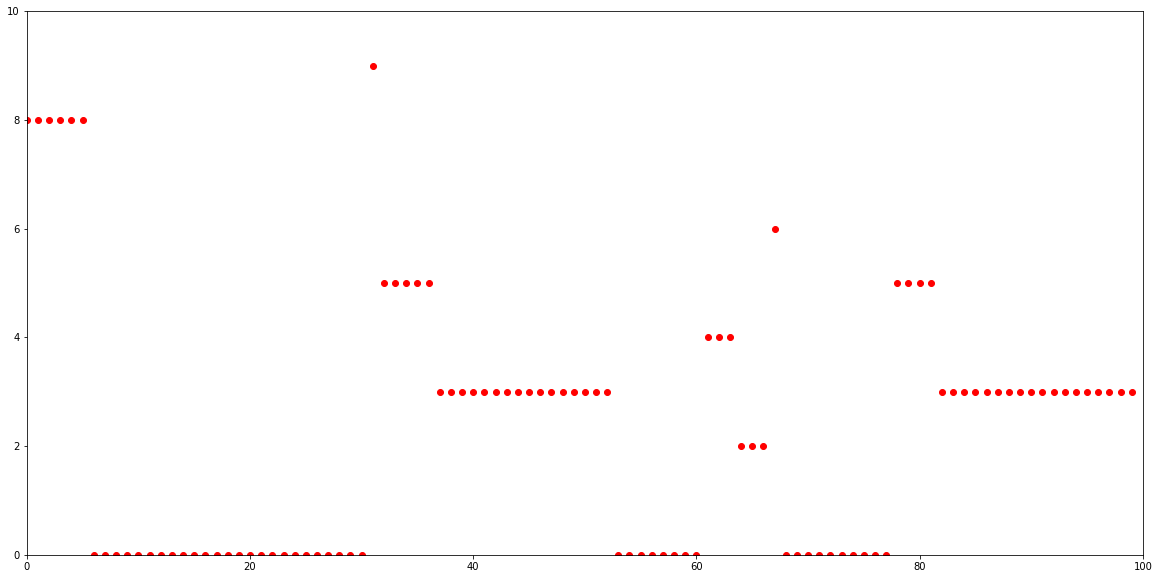

In [7]:
plt.figure(figsize=(20,10))
plt.plot(t, states, 'ro')
plt.axis([0,100,0,10])
plt.show()

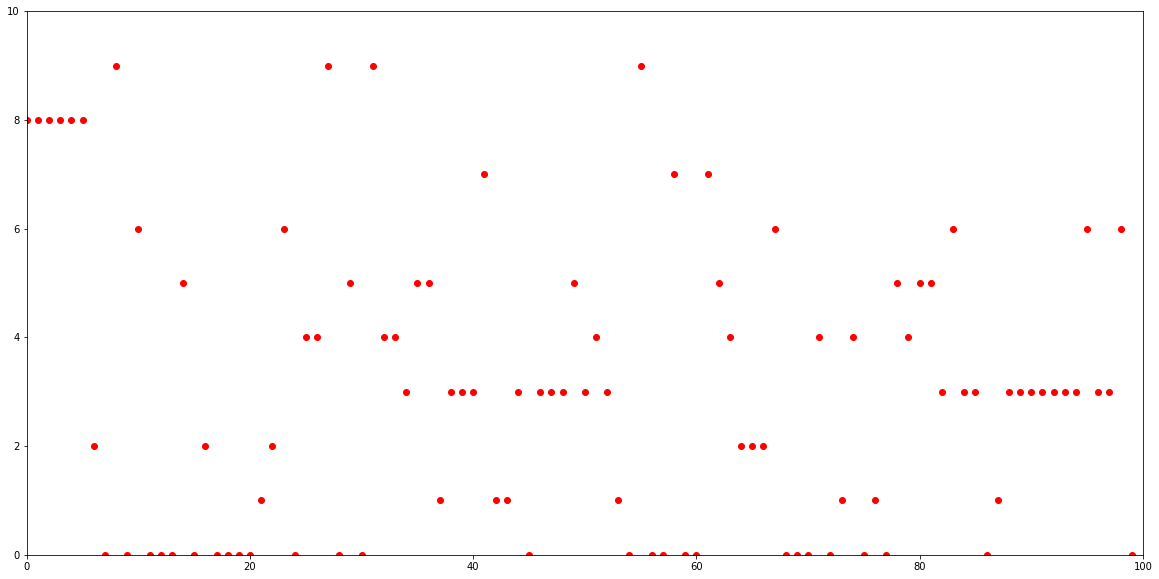

In [8]:
plt.figure(figsize=(20,10))
plt.plot(t, observations, 'ro')
plt.axis([0,100,0,10])
plt.show()

In [9]:
update, predict = hmm.forward_pass(observations)

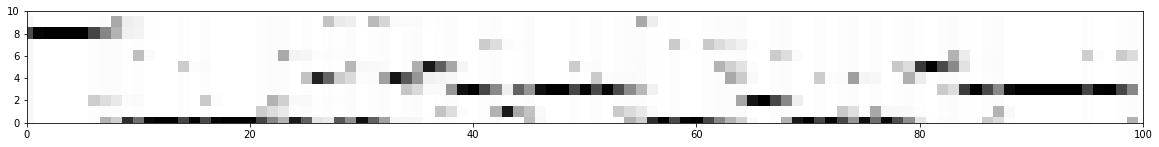

In [10]:
alfa = utils.normalize_exp(update,0)
plt.figure(figsize=(20,10))
plt.imshow(alfa, interpolation='nearest', cmap='gray_r')
plt.axis([0,100,10,0])
plt.gca().invert_yaxis()
plt.show()

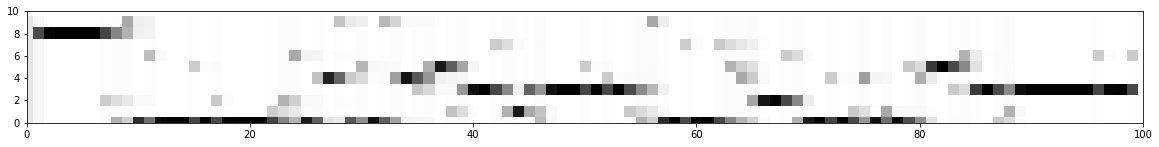

In [11]:
alfa = utils.normalize_exp(predict,0)
plt.figure(figsize=(20,10))
plt.imshow(alfa, interpolation='nearest', cmap='gray_r')
plt.axis([0,100,10,0])
plt.gca().invert_yaxis()
plt.show()

In [12]:
_, postdict = hmm.backward_pass(observations)

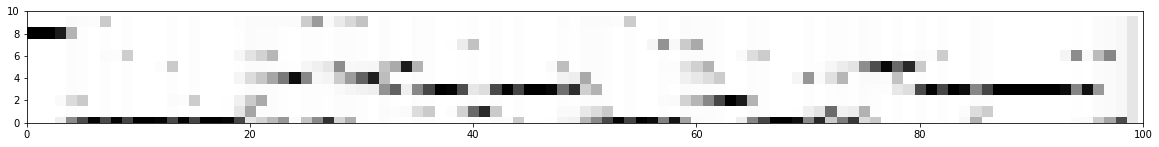

In [13]:
beta = utils.normalize_exp(postdict,0)
plt.figure(figsize=(20,10))
plt.imshow(beta, interpolation='nearest', cmap='gray_r')
plt.axis([0,100,10,0])
plt.gca().invert_yaxis()
plt.show()

In [14]:
log_gamma = hmm.forward_backward(observations)

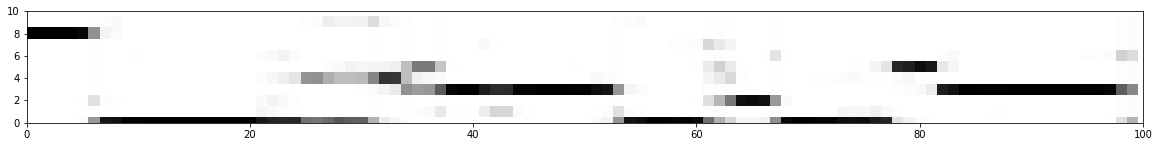

In [15]:
gamma = utils.normalize_exp(log_gamma,0)
plt.figure(figsize=(20,10))
plt.imshow(gamma, interpolation='nearest', cmap='gray_r')
plt.axis([0,100,10,0])
plt.gca().invert_yaxis()
plt.show()

In [16]:
max_path = hmm.viterbi(observations)

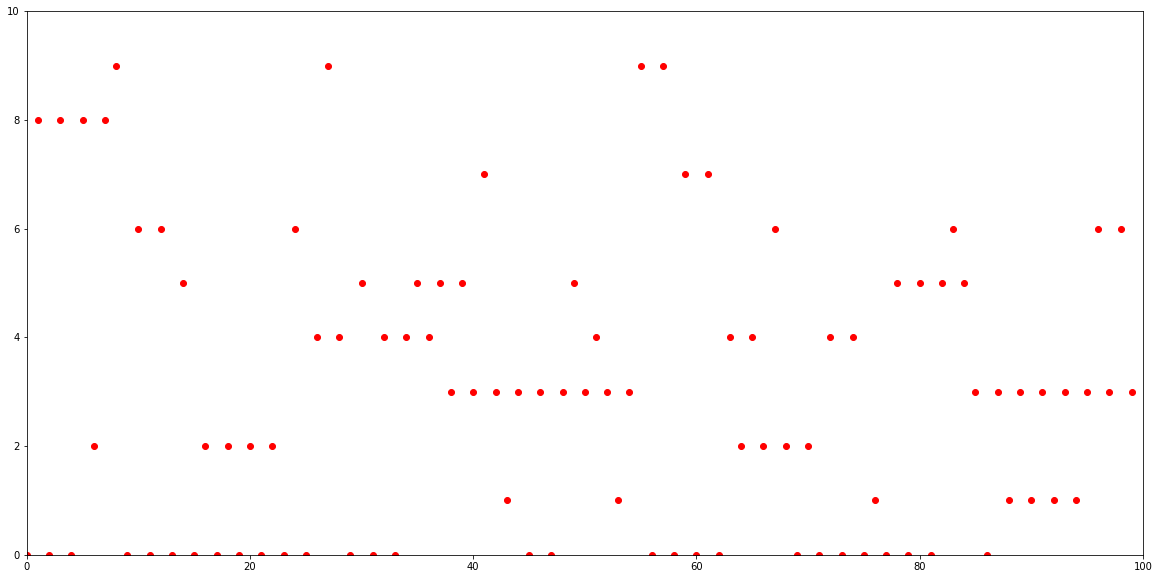

In [17]:
plt.figure(figsize=(20,10))
plt.plot(t, max_path, 'ro')
plt.axis([0,100,0,10])
plt.show()

In [23]:
y_list = []
for _ in range(400):
    _,y = hmm.generate_data(100)
    y_list.append(y)

In [24]:
A_estimated, B_estimated, pi_estimated = hmm.parameter_estimation_em(y_list,20)

In [25]:
print A_estimated

[[0.18895101 0.04254359 0.07859383 0.06981549 0.14147382 0.09733829
  0.06899878 0.07155326 0.07127196 0.05472677]
 [0.02505195 0.00269573 0.21461228 0.12847442 0.2095186  0.04003873
  0.03543141 0.10758814 0.17340641 0.17335858]
 [0.16529554 0.13300052 0.00492863 0.13344256 0.03003602 0.1639232
  0.20618357 0.20533963 0.02260593 0.10605629]
 [0.16357204 0.21174743 0.03705077 0.13420019 0.07903581 0.17183719
  0.11902291 0.06766915 0.13023655 0.08591492]
 [0.02220145 0.15014976 0.13069304 0.0126218  0.19159554 0.12571058
  0.08237089 0.05745324 0.16159888 0.13447885]
 [0.01069464 0.01227103 0.21665914 0.09840881 0.05526608 0.12921528
  0.08451251 0.13453607 0.04520568 0.10738518]
 [0.08191466 0.18683954 0.01750582 0.12272027 0.15933545 0.16243027
  0.04925646 0.08621541 0.04943454 0.08540221]
 [0.06589905 0.0543218  0.01287466 0.11921113 0.03660061 0.03510854
  0.09348334 0.16304184 0.09015074 0.16609445]
 [0.23182259 0.0611015  0.10637619 0.05976249 0.09454738 0.06399506
  0.09253171 

In [26]:
print B_estimated

[[0.10020563 0.0297899  0.13424648 0.11476506 0.1157929  0.11900248
  0.09335116 0.12669214 0.03983683 0.09895662]
 [0.02531376 0.13414378 0.11722339 0.19520915 0.01015837 0.1137367
  0.09071725 0.19614896 0.08733859 0.02110938]
 [0.06077821 0.13391295 0.10065006 0.0672422  0.07343369 0.08546364
  0.11597178 0.03561659 0.09656952 0.04502906]
 [0.05513137 0.22464808 0.15189264 0.00848108 0.15538028 0.12811667
  0.02697193 0.08606169 0.12168643 0.00144063]
 [0.01521968 0.11106663 0.06483402 0.05365576 0.12031917 0.08208703
  0.15038084 0.17579414 0.08070078 0.1878518 ]
 [0.1437008  0.08605392 0.04877302 0.22654762 0.13318489 0.12000177
  0.12036358 0.07991628 0.0510908  0.14576825]
 [0.14162307 0.10669558 0.03047282 0.13642329 0.09491242 0.10035407
  0.05650379 0.09002673 0.17562446 0.11353582]
 [0.22887101 0.02146046 0.12495996 0.05485688 0.13371393 0.10142227
  0.03010007 0.14369193 0.22021175 0.10914151]
 [0.02267193 0.0838879  0.1454389  0.00507513 0.0597815  0.13889406
  0.1189629  

In [27]:
print pi_estimated

[0.00203179 0.21145174 0.20409878 0.45538885 0.08459873 0.00257816
 0.01909309 0.00076389 0.00531005 0.01468492]
